<a href="https://colab.research.google.com/github/zhpinkman/coursera-nlp/blob/master/nlp_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import pandas as pd

In [60]:
df = pd.read_csv('data.csv')
print(df['Suggestion'].unique())
df

[1 3 2]


,Text,Score,Suggestion
0,این اولین تجربه من برای خرید ایفون هست امروز...,100,1
1,خرید این محصول رو توصیه میکنم,84,1
2,1 ساله این گوشی رو دارم هیچ نقطه ضعفی ازش ند...,60,1
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیف...,96,1
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...,92,1
...,...,...,...
3256,کیفت ساختش خوبه تنوعش هم خوبه فقط مشکلش اینه...,84,2
3257,خیلی خوب و به درد بخوره و اندازشم عالیه,100,1
3258,عالیه خیلی دوسش دارم قیمتش یه کم زیاده ولی به ...,100,1
3259,من این مینی فرز رو از دیحیکالا سفارش دادم و به...,84,1


In [61]:
texts = df['Text'].values
words = list()
for sen in texts:
    words.append(sen.split(' '))
lens = 0
for sen in words:
    lens += len(sen)
print(lens/len(words))

56.590616375344986


In [62]:
def calculate_lens(x):
    text_list = x['Text'].split(' ')
    return len(text_list)
text_lens = df.apply(calculate_lens, axis=1)
print(df['Text'][6])
text_lens

اول از همه خوشحالم که بالاخره نسخه های 128 گیگابایتی برای فروش قرار گرفت چون همیشه من با حافظه گوشی های اندرویدی مشکل داشتم  گوشی قبلی من s7 بود و بعد از 2 سال استفاده که بسیار هم راضی بودم به دلیل تغییرات مثبتی که در گوشی های سامسونگ ایجاد شد تصمیم گرفتم گوشی رو عوض کنم این گوشی واقعا زیباست و طراحی منحصر به فردی داره  زمانی که گوشی رو در دست میگیرید بسیار خودش دست هست و حس خیلی خوبی داره تنها دلیلی که نسخه پلاس رو انتخاب نکردم بزرگی بیش از حد و وزن گوشی بود ولی این نسخه از نظر اندازه فوق العادست کیفیت و بلندی صدای  اسپیکر  ها عالی هست  زمانی که با گوشی قبلی خودم تست کردم واقعا تفاوت زیادی حس میشد  همچنین با گوشی HTC U11 هم مقایسه کردم و باز هم بلندی صدای اس 9 بیشتر بود اما از نظر کیفیت شاید کمی u11 بهتر بود  نگرانی من جای سنسور اثر انگشت بود چون با اس8 که کار کرده بودم اصلا جای مناسبی نداشت ولی این مشکل با تغییر جای سنسور بنظرم کاملا حل شده و سرعت سنسور هم عالی هست و با وجود Intelligent scan که ترکیب سنسور عنبیه و تشخیص چهره هست خیلی نیازی به اثر انگشت احساس نمیشه چون حتی توی تاریکی 

0        31
1         7
2        14
3        33
4        56
       ... 
3256     23
3257     10
3258     30
3259    102
3260     30
Length: 3261, dtype: int64

In [63]:
df = df[['Text', 'Score']]
df = df[(df.Score > 70) | (df.Score < 60)]
df
def labelScore(x):
    if x.Score > 70:
        x.Score = 0
    elif x.Score < 60:
        x.Score = 1
    return x

df = df.apply(labelScore, axis=1)
df

,Text,Score
0,این اولین تجربه من برای خرید ایفون هست امروز...,0
1,خرید این محصول رو توصیه میکنم,0
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیف...,0
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...,0
6,اول از همه خوشحالم که بالاخره نسخه های 128 گیگ...,0
...,...,...
3256,کیفت ساختش خوبه تنوعش هم خوبه فقط مشکلش اینه...,0
3257,خیلی خوب و به درد بخوره و اندازشم عالیه,0
3258,عالیه خیلی دوسش دارم قیمتش یه کم زیاده ولی به ...,0
3259,من این مینی فرز رو از دیحیکالا سفارش دادم و به...,0


In [64]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

texts = df.Text.values
tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(texts)

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

encoded_docs = tokenizer.texts_to_sequences(texts)

padded_sequence = pad_sequences(encoded_docs, maxlen=70, padding='post')

dict(list(tokenizer.word_index.items())[:20])

10771


{'از': 3,
 'استفاده': 18,
 'این': 4,
 'با': 7,
 'برای': 12,
 'به': 5,
 'خیلی': 11,
 'داره': 13,
 'در': 8,
 'رو': 6,
 'من': 10,
 'می': 19,
 'های': 17,
 'هست': 16,
 'هم': 9,
 'و': 1,
 'ولی': 15,
 'که': 2,
 'کیفیت': 14,
 'یه': 20}

In [65]:
print(texts[0])
print(encoded_docs[0])
print(padded_sequence[0])

این اولین تجربه من برای خرید ایفون هست   امروز ب دستم رسیده   به اسم طلایی هست ولی دراصل رزگلده  خیلی هم خوش رنگ هست  
[4, 371, 443, 10, 12, 49, 16, 327, 341, 168, 738, 5, 1119, 16, 15, 11, 9, 354, 120, 16]
[   4  371  443   10   12   49   16  327  341  168  738    5 1119   16
   15   11    9  354  120   16    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0]


In [66]:
print(padded_sequence.shape)
print(df.Score.values)

(2514, 70)
[0 0 0 ... 0 0 1]


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequence, df.Score.values, test_size=0.3, shuffle=True)

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32

model = Sequential()

model.add(Embedding(vocab_size, embedding_vector_length, input_length=70))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 70, 32)            344672    
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 70, 32)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 361,323
Trainable params: 361,323
Non-trainable params: 0
_________________________________________________________________
None


In [69]:
history = model.fit(X_train, y_train, batch_size=32, epochs=40, validation_split=0.2)

Epoch 1/40
44/44 [==============================] - 4s 102ms/step - loss: 0.5567 - accuracy: 0.7910 - val_loss: 0.5211 - val_accuracy: 0.7812
Epoch 2/40
44/44 [==============================] - 4s 97ms/step - loss: 0.4983 - accuracy: 0.8010 - val_loss: 0.5260 - val_accuracy: 0.7812
Epoch 3/40
44/44 [==============================] - 4s 97ms/step - loss: 0.4994 - accuracy: 0.8010 - val_loss: 0.5213 - val_accuracy: 0.7812
Epoch 4/40
44/44 [==============================] - 4s 93ms/step - loss: 0.4940 - accuracy: 0.8010 - val_loss: 0.5199 - val_accuracy: 0.7812
Epoch 5/40
44/44 [==============================] - 4s 96ms/step - loss: 0.4876 - accuracy: 0.8024 - val_loss: 0.5144 - val_accuracy: 0.7812
Epoch 6/40
44/44 [==============================] - 4s 95ms/step - loss: 0.4366 - accuracy: 0.8266 - val_loss: 0.5507 - val_accuracy: 0.7017
Epoch 7/40
44/44 [==============================] - 4s 94ms/step - loss: 0.3710 - accuracy: 0.8692 - val_loss: 0.4488 - val_accuracy: 0.7983
Epoch 8/40
4

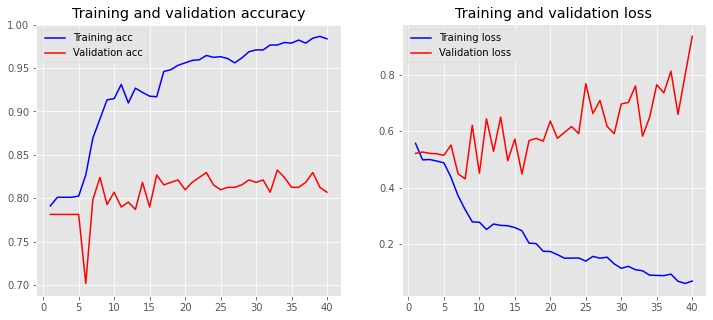

In [70]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

In [71]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 11ms/step - loss: 0.8655 - accuracy: 0.8344


[0.8655272722244263, 0.8344370722770691]

**word2vec gensim**

In [ ]:
data = pd.read_csv('data.csv')
data

,Text,Score,Suggestion
0,این اولین تجربه من برای خرید ایفون هست امروز...,100,1
1,خرید این محصول رو توصیه میکنم,84,1
2,1 ساله این گوشی رو دارم هیچ نقطه ضعفی ازش ند...,60,1
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیف...,96,1
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...,92,1
...,...,...,...
3256,کیفت ساختش خوبه تنوعش هم خوبه فقط مشکلش اینه...,84,2
3257,خیلی خوب و به درد بخوره و اندازشم عالیه,100,1
3258,عالیه خیلی دوسش دارم قیمتش یه کم زیاده ولی به ...,100,1
3259,من این مینی فرز رو از دیحیکالا سفارش دادم و به...,84,1


In [ ]:
!pip install hazm

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

from hazm import *

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
persian = open('persian', encoding='utf-8')
words = persian.read().split('\n')
stopwords = list()
for word in words:
    word = word.replace('\u200c', '')
    stopwords.append(word)

In [ ]:
lines = data['Text'].values.tolist()

print(lines[0])
stemmer = Stemmer()

review_lines = []

for line in lines:
    tokens = word_tokenize(line)
    words = [w for w in tokens if not w in stopwords]
    words = [stemmer.stem(w) for w in words]
    review_lines.append(words)

len(review_lines)

این اولین تجربه من برای خرید ایفون هست   امروز ب دستم رسیده   به اسم طلایی هست ولی دراصل رزگلده  خیلی هم خوش رنگ هست  


3261

In [ ]:
import gensim

model = gensim.models.Word2Vec(sentences=review_lines, size=100, window=5, workers=4, min_count=1)

words = list(model.wv.vocab)
print('Vocabulary size: %d' % len(words))

Vocabulary size: 9294


In [ ]:
model.wv.most_similar('موبایل')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('نیاز', 0.9999120235443115),
 ('ظرف', 0.9999090433120728),
 ('گوش', 0.9999082088470459),
 ('کوچک', 0.9999077320098877),
 ('دستگاه', 0.9999046325683594),
 ('میتونید', 0.9999037981033325),
 ('باشه', 0.9998992681503296),
 ('پخ', 0.9998987913131714),
 ('هدفون', 0.9998986721038818),
 ('نمیشه', 0.9998983144760132)]